## Currently easy trials are not removed for any plot, however all results are the same if you do remove easy trials

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
from cycler import cycler

# figure_path = '/home/jrowland/Documents/figures/s1s2_paper/0/'

# def save_figure(name, base_path='/home/jrowland/Documents/figures/s1s2_paper/0/'):
#     plt.rcParams['pdf.fonttype'] = 42
#     plt.savefig(os.path.join(base_path, f'{name}.pdf'), 
#                 bbox_inches='tight', transparent=True)

In [4]:
import popoff
from pop_off_functions import save_figure
import pop_off_plotting
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel

/home/tplas/repos/popping-off/popoff/popoff/loadpaths.py
/home/tplas/repos/Vape


In [5]:
## put your path to your vape repo here 
# path_to_vape = os.path.expanduser('~/Documents/code/Vape/')
# popoff_path = '/home/jrowland/Documents/code/pop-off/scripts/'

# Bit hacky but oh well
# sys.path.append(path_to_vape)
# sys.path.append(os.path.join(path_to_vape, 'utils'))
# sys.path.append(popoff_path)

from utils.utils_funcs import d_prime

In [6]:
from matplotlib import rcParams


# params = {'legend.fontsize': 'xx-large',
#          'axes.labelsize': 'xx-large',
#          'axes.titlesize':'xx-large',
#          'xtick.labelsize':'xx-large',
#          'ytick.labelsize':'xx-large'}

plt.rc("axes.spines", top=False, right=False) # despine

COLORS = [
'#228E5E', # Hit green
'#DB3713', # Miss red
]

## MAKE THE FONT SIZE 20 or 21
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 14


# rcParams.update(params)


In [7]:
pas = PoolAcrossSessions(remove_targets=False, subsample_sessions=False,
                         remove_toosoon=True)

long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time


In [8]:
print(pas.plot_string(is_plot=False))

Hello Adam
Remove targets is False.
Remove too soon is True
Here are the sessions in play:
['Mouse J064, run 10', 'Mouse J064, run 11', 'Mouse J064, run 14', 'Mouse RL070, run 28', 'Mouse RL070, run 29', 'Mouse RL117, run 29', 'Mouse RL117, run 30', 'Mouse RL123, run 22', 'Mouse RL116, run 32', 'Mouse RL116, run 33']
pre-frames spans -2.1 to -0.1 inclusive
post-frames spans 0.83 to 6.0 inclusive


Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 

(-0.5, 2.5)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


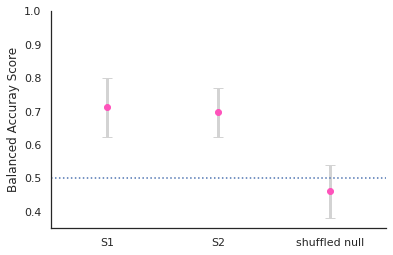

In [9]:
coefs = pas.compare_regions(frames = 'pre')
plt.ylabel('Balanced Accuray Score')
plt.ylim(0.35, 1)
plt.xlim(-0.5, 2.5)
# save_figure('Figure4_pre-stim-allCellsDecoder_S1S2null')

In [10]:
def select_cells_and_frames(lm, region='s1', frames='pre'):
    
    flu = lm.flu
    flu = flu[lm.region_map[region], :, :]
    flu = flu[:, :, lm.frames_map['pre']]
    
    return flu

In [11]:
def firing_rate_dist(lm, region, match_tnums=False, sort=False):
    
    flu = select_cells_and_frames(lm, region=region, frames='pre')

    flu = np.mean(flu, 2)  # Mean across time

    miss = flu[:, lm.session.outcome == 'miss']
    n_misses = miss.shape[1]

    hit = flu[:, lm.session.outcome == 'hit']
    n_hits = hit.shape[1]
    
    if match_tnums:
        keep_idx = np.random.choice(np.arange(n_hits), size=n_misses, replace=False)
        hit = hit[:, keep_idx]
        assert hit.shape == miss.shape
        
    # Mean across trials
    hit = np.mean(hit, 1)
    miss = np.mean(miss, 1)
    
    if sort:
        hit = np.sort(hit)
        miss = np.sort(miss)

    plt.figure(figsize=(20,6))
    
    plt.subplot(2,1,2)
    plt.bar(np.arange(len(miss)), miss, width=2, color=COLORS[1], label='miss')
    ylims = plt.gca().get_ylim()
    plt.xlabel('Cell ID')
    plt.legend()

    plt.subplot(2,1,1)
    bar_width = 2
    plt.bar(np.arange(len(hit)), hit, width=2, color=COLORS[0], label='hit')
    plt.ylim(ylims)
    plt.legend()


    _ = plt.text(-50, (ylims[1]+ylims[0])/2, 'DF/F meaned across\nframes pre-stim and\nacross trials', 
             rotation=90, fontsize=20)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


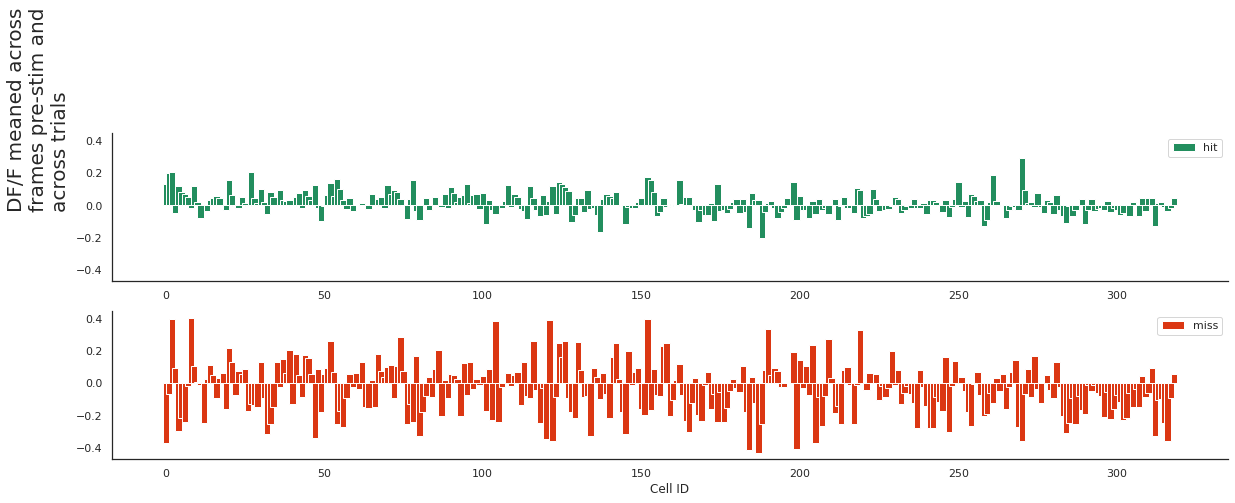

In [12]:
lm = pas.linear_models[0]
firing_rate_dist(lm, region='s1', match_tnums=False, sort=False)
# save_figure('Figure4_firingRateDist')

In [13]:
def get_covariates(lm, region, match_tnums=False):
    
    covariate_dict, y = lm.prepare_data('all', 'partial', n_comps_include=0,
                                        outcomes=['hit', 'miss'],
                                        region=region, return_matrix=False,
                                        remove_easy=False)
    
    covariate_dict['y'] = y
    
    if match_tnums:
        hit_idx = np.where(y==1)[0]
        miss_idx = np.where(y==0)[0]
        n_misses = len(miss_idx)
        hit_idx = np.random.choice(hit_idx, size=n_misses)
        keep_idx = np.hstack((hit_idx, miss_idx))
        covariate_dict = {k:v[keep_idx] for k,v in covariate_dict.items()}
        y = y[keep_idx]
    
        assert sum(y==0) == sum(y==1)
    
    return covariate_dict

Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}


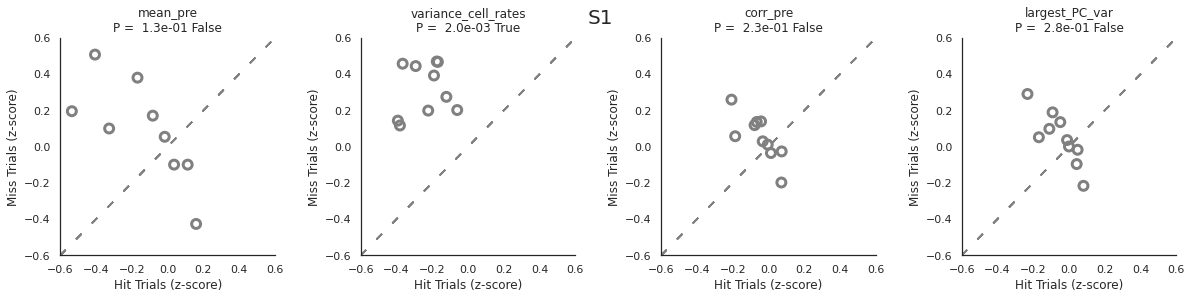

In [14]:
# for region in ['s1', 's2', 'all']:
for region in ['s1']:

    cov_dicts = []
    for linear_model in pas.linear_models:
        cov_dicts.append(get_covariates(linear_model, region))

    plt.figure(figsize=(20,4))
    n_plots = 0

    cov_names = ['mean_pre', 'variance_cell_rates', 'corr_pre', 'largest_PC_var']

    for cov_name in cov_names:
        n_plots += 1
        ax = plt.subplot(1,4,n_plots)

        all_hit = []
        all_miss = []

        for cov_dict in cov_dicts:

            data = stats.zscore(cov_dict[cov_name])

            hit = data[cov_dict['y']==1]
            miss = data[cov_dict['y']==0]

            plt.scatter(np.mean(hit), np.mean(miss), s=80, facecolors='none', edgecolors='grey',
                        linewidth=3)

            lims = (-0.6,0.6)
            plt.xlim(lims)
            plt.ylim(lims)

            plt.plot(lims, lims, linestyle=(0, (5, 10)), color='grey')

            all_hit.append(np.mean(hit))
            all_miss.append(np.mean(miss))
            
            plt.xlabel('Hit Trials (z-score)')
            plt.ylabel('Miss Trials (z-score)')

        _, p_val = stats.wilcoxon(all_hit, all_miss)
        plt.title(f'{cov_name}\nP = {p_val: .1e} {p_val<(0.05 / len(cov_names))}')
    plt.subplots_adjust(wspace=0.4, hspace=0.7)
    plt.suptitle(region.upper(), fontsize=20)
    
#     save_figure(f'covarites_sessions_{region}')

Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}
Labels will be encoded by hash table {'miss': 0, 'hit': 1}


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


WilcoxonResult(statistic=0.0, pvalue=0.001953125)


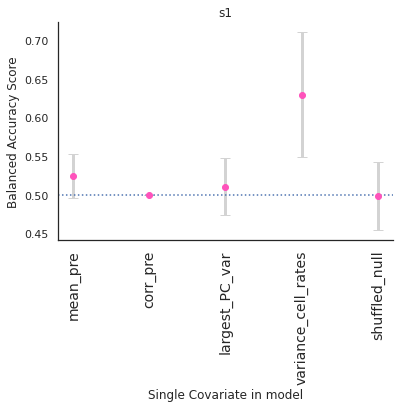

In [15]:
region = 's1'
pas.single_covariate(region=region)
# save_figure(f'Figure4_singleCovarite_{region}')